# Week 3 Mini-Project 3: Breast Cancer Campaign

In [1]:
# Just to ignore warnings

import warnings
warnings.filterwarnings('ignore')

# 1- Download the Dataset
Download the Dataset from the following link: \
https://www.kaggle.com/mirichoi0218/insurance/download

# 2- Read the Dataset
Read the dataset into a Pandas Dataframe. 

In [2]:
import pandas as pd

df = pd.read_csv('insurance.csv')

initial_length = len(df)

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Does the dataset include any missing values? If so, drop them. \
Hint: Pandas can do that with one line of code!

In [3]:
df.isna().sum(axis = 0)

# No missing values. There is an Unnamed column to be deleted in the next step

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 3- Perform Preprocessing
Perform any needed preprocessing on the chosen features including: \
Scaling. \
Encoding. \
Dealing with Nan values. \
Normalization.

In [4]:
df = pd.get_dummies(data=df, drop_first=True) # Encode categorical columns
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [5]:
# Shift charges to the first column

first_column = df.pop('charges')

df.insert(0, 'charges', first_column)

In [6]:
df.head()

,charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,16884.92400,19,27.900,0,0,1,0,0,1
1,1725.55230,18,33.770,1,1,0,0,1,0
2,4449.46200,28,33.000,3,1,0,0,1,0
3,21984.47061,33,22.705,0,1,0,1,0,0
4,3866.85520,32,28.880,0,1,0,1,0,0


# 4. Prepare Visualization

You are required to deliver a number of visualization for your dataset, including: \
• Pair Plots for the features. \
• Correlation Matrix heat map. \
• Box plots for the features.

In [7]:
corr = df.corr()
corr

,charges,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
charges,1.000000,0.299008,0.198341,0.067998,0.057292,0.787251,-0.039905,0.073982,-0.043210
age,0.299008,1.000000,0.109272,0.042469,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.198341,0.109272,1.000000,0.012759,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.067998,0.042469,0.012759,1.000000,0.017163,0.007673,0.024806,-0.023066,0.021914
sex_male,0.057292,-0.020856,0.046371,0.017163,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,0.787251,-0.025019,0.003750,0.007673,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.039905,-0.000407,-0.135996,0.024806,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,0.073982,-0.011642,0.270025,-0.023066,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,-0.043210,0.010016,-0.006205,0.021914,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


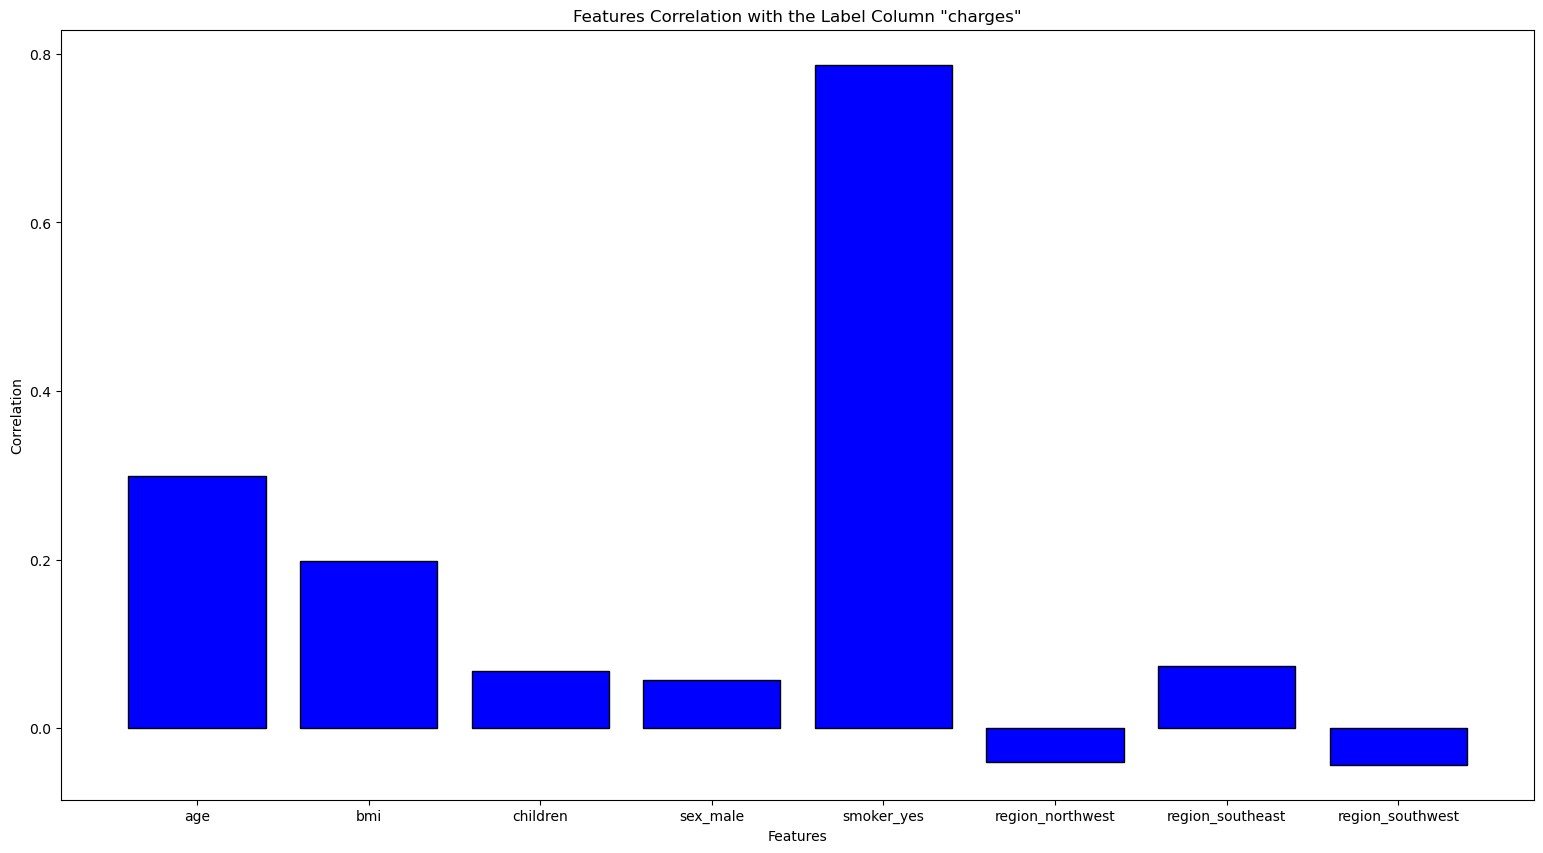

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(19, 10))

# Plot the correlation Matrix without the Charges column
plt.bar(corr.charges.index[1:9], corr.charges.values[1:9], color='blue', edgecolor='black')

plt.title('Features Correlation with the Label Column "charges"')
plt.xlabel('Features')
plt.ylabel('Correlation')


# Displaying the plot
plt.show()

<AxesSubplot:>

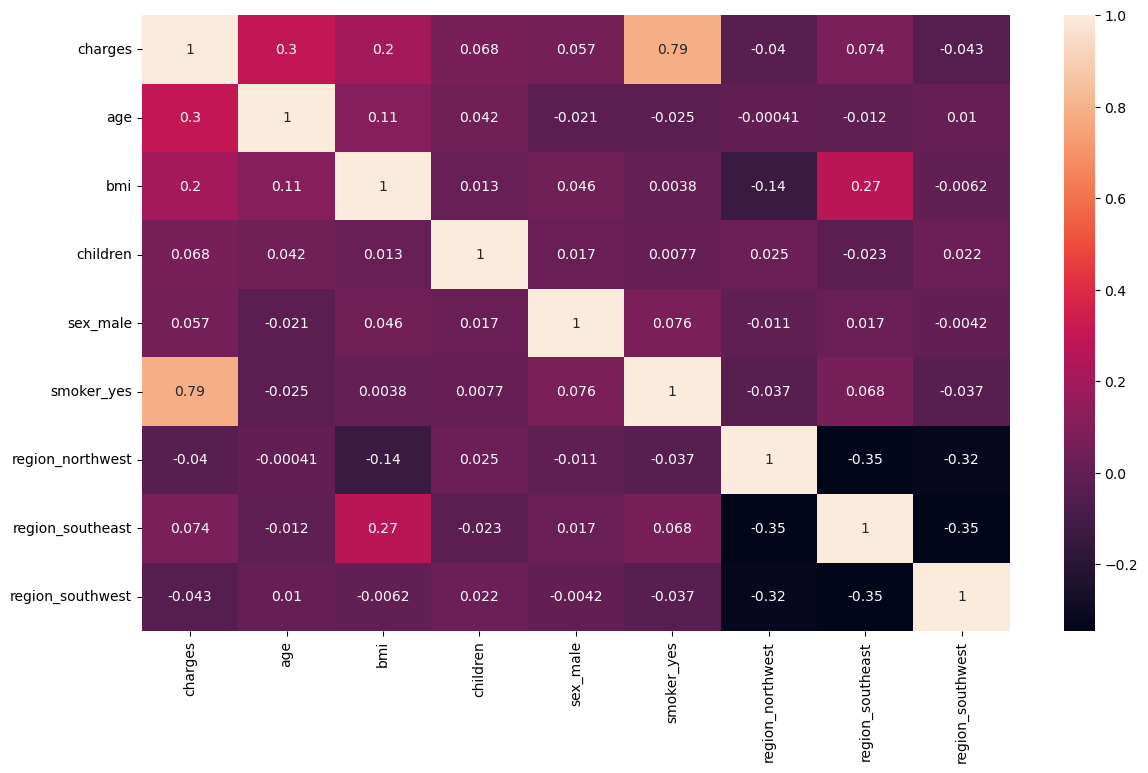

In [9]:
import seaborn as sn

# plot the heatmapx_columns = len(df.columns) - 1

plt.figure(figsize = (14,8))
sn.heatmap(df.corr(), annot = True)

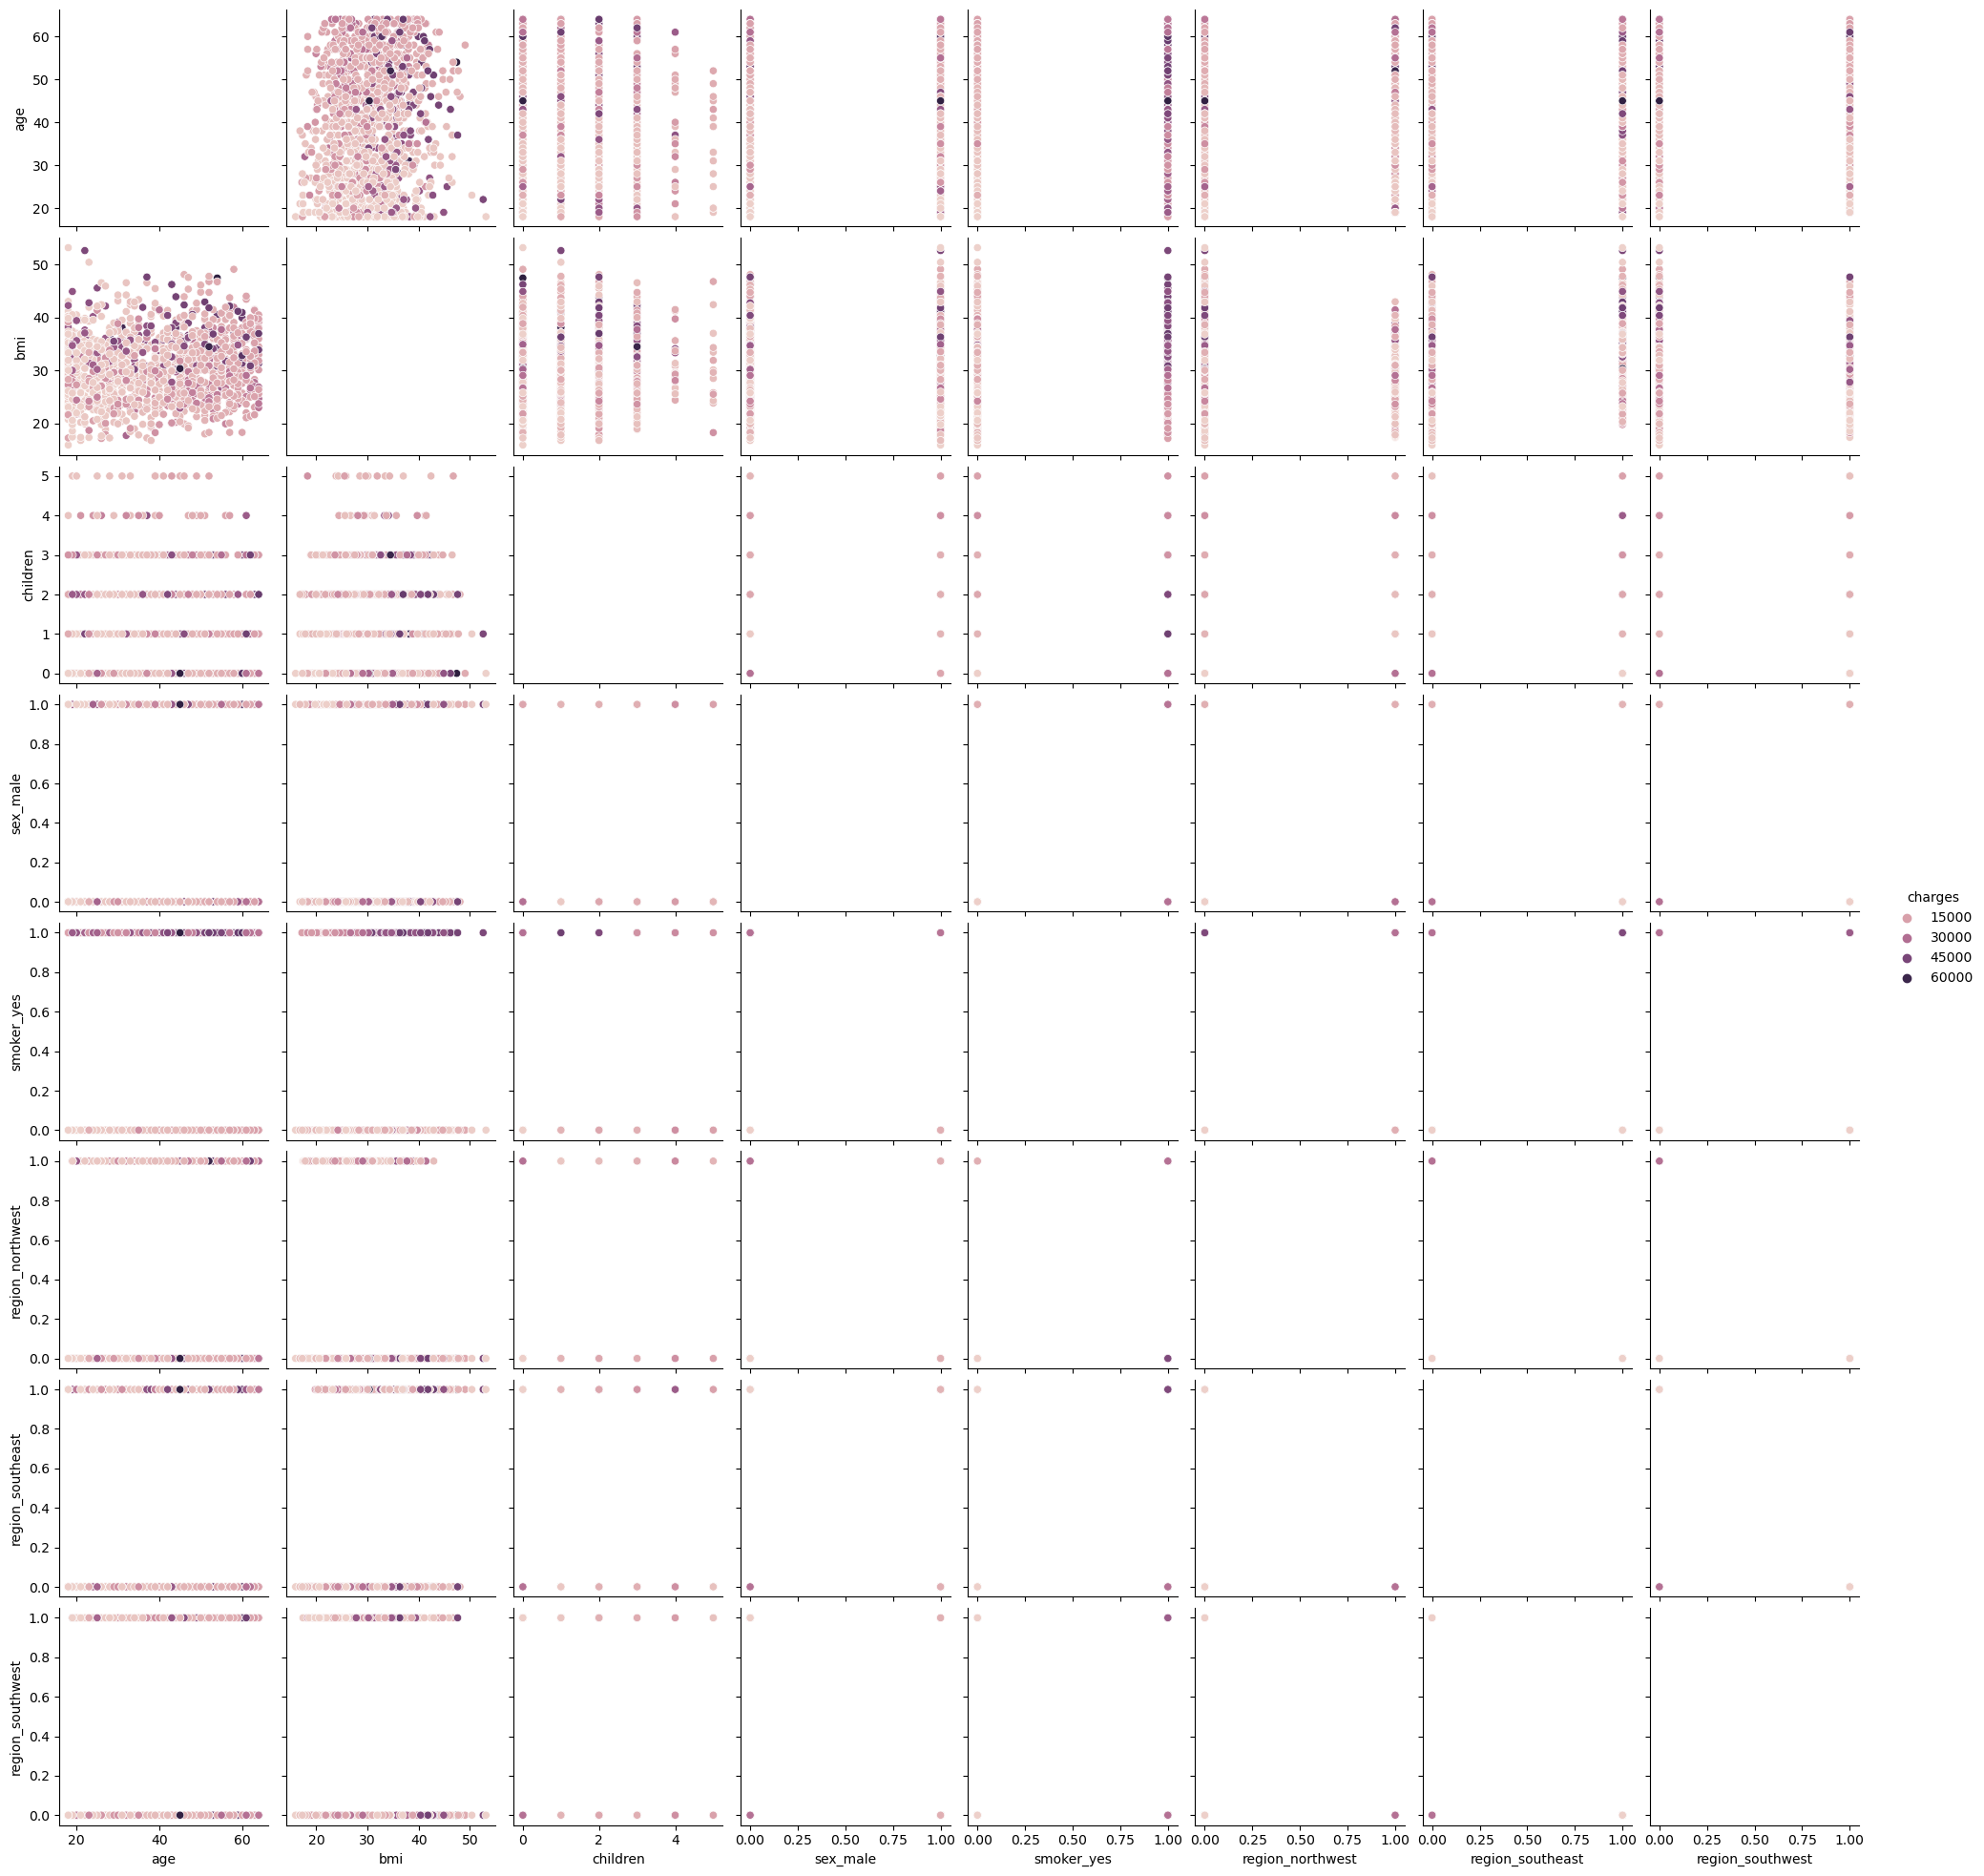

In [10]:
# Pair plots allow us to quickly view the relationship between all features
sn.pairplot(df, hue="charges")

## Scale data

In [11]:
# Create feature and target columns

x_columns = len(df.columns)

X = df.iloc[:, 1:x_columns].values
y = df.iloc[:, 0].values

In [12]:
# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Split the Data
Split your data as follows: \
80% training set \
10% validation set \
10% test set

In [13]:
# Split training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)
print(len(X_train), len(X_test))

1070 268


In [14]:
# Split validation data

X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print(len(X_train), len(X_test), len(X_validate))

1070 134 134


# 6. Train Regressor

Use decision trees, random forests and support vector regressions (SVRs) to fit your data. \
Get r2 scores, mean square error (MSE) scores and mean absolute error (MAE) scores. You need a minimum r2 score of 82% \
Compare the results of different models. \
Hint: You need to choose the optimal value for the criteria for both decision trees and random forests using cross-validation.


## Decision Tree Regressor

In [15]:
# Create Decision Tree instance

from sklearn.tree import DecisionTreeRegressor

modelTree = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)

scoreDT = modelTree.score(X_test, y_test)

print("Decision Tree has a score of:", scoreDT)

Decision Tree has a score of: 0.6165885771124546


In [16]:
# Optimize a Decision tree regressor model using GridSearch

param_grid={'criterion': ['squared_error', 'msa'],
            'max_depth': range(1, 5, 1),
            'min_samples_leaf': range(1, 5, 1),
            'min_samples_split': range(1, 5, 1)}

In [17]:
# import GridSearchCV from model_selection
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(modelTree, param_grid, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, min_samples_leaf=1, min_samples_sp

[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max

[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max

[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=4, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max

[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=msa, max_depth=1, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=msa, max_de

[CV] END criterion=msa, max_depth=3, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=1; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=msa, max_de

[CV] END criterion=msa, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=msa, max_depth=4, min_samples_leaf=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=msa, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=msa, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=msa, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=msa, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END criterion=msa, max_depth=4, min_samples_leaf=4, min_samples_split=4; total time=   0.0s


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'msa'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             verbose=2)

In [18]:
print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2} with a score of 0.84


In [19]:
# Cross check the model with best criteria and validation data

modelTree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 4, min_samples_leaf = 4, min_samples_split = 2, random_state = 0).fit(X_train, y_train)

scoreDT = modelTree.score(X_validate, y_validate)

print("Decision Tree with best critiria has a score of:", scoreDT)

    
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predDT = modelTree.predict(X_validate)

MAEscoreDT = mean_absolute_error(y_test,y_predDT)
MSEscoreDT = mean_squared_error(y_test,y_predDT)

print('Decision Tree with best critiria has an MAE: ' + str(MAEscoreDT))

print('Decision Tree with best critiria has an MSE: ' + str(MSEscoreDT))


Decision Tree with best critiria has a score of: 0.9486938547063635
Decision Tree with best critiria has an MAE: 13096.393062714445
Decision Tree with best critiria has an MSE: 332168027.2445585


## Random Forest Regressor

In [20]:
# Create a Random Forest regressor's instance

from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators = 20).fit(X_train, y_train)

scoreRF = modelRF.score(X_test, y_test)

print("Random forest Model gives a score of:", scoreRF)

Random forest Model gives a score of: 0.8070414898967863


In [21]:
# Optimize a RF regressor model using GridSearch

param_grid={'n_estimators': range(10, 100, 15),
            'max_depth': [3, 4],
            'min_samples_leaf': [5, 6],
            'min_samples_split': [5, 6]}

In [22]:
grid = GridSearchCV(modelRF, param_grid, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_s

[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=5, n_estimators=85; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END m

[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=55; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=55; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=55; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=5, min_samples_split=6, n_estimators=85; total time=   0.0s
[CV] END m

GridSearchCV(estimator=RandomForestRegressor(n_estimators=20),
             param_grid={'max_depth': [3, 4], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [5, 6],
                         'n_estimators': range(10, 100, 15)},
             verbose=2)

In [23]:
print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 40} with a score of 0.85


In [29]:
# Cross check the model with best criteria and validation data

modelRF = RandomForestRegressor(max_depth = 4, min_samples_leaf = 6, 
                                min_samples_split = 5, n_estimators = 40).fit(X_train, y_train)

scoreRf = modelRF.score(X_validate, y_validate)

print("Random Forest with best critiria has a score of:", scoreRF)

    
y_predRF = modelRF.predict(X_validate)

MAEscoreRF = mean_absolute_error(y_test,y_predRF)
MSEscoreRF = mean_squared_error(y_test,y_predRF)

print('Random Forest with best critiria has an MAE: ' + str(MAEscoreRF))

print('Random Forest with best critiria has an MSE: ' + str(MSEscoreRF))

Random Forest with best critiria has a score of: 0.8070414898967863
Random Forest with best critiria has an MAE: 13004.787535196388
Random Forest with best critiria has an MSE: 328673480.93057185


## SVR Linear Regression

In [25]:
from sklearn.svm import SVR

modelSVR = SVR(C=20, kernel='linear', gamma='auto', epsilon = 0.1).fit(X_train, y_train)

y_predSVR = modelSVR.predict(X_validate) #using validate data to compare using the smae dataset

scoreSVR = modelSVR.score(X_validate, y_validate) #using validate data to compare using the smae dataset

print("Linear SVR model gives a score of:", round(scoreSVR, 4))

Linear SVR model gives a score of: 0.6392


In [32]:
from sklearn.svm import SVR

deg = list(range(1,10))
scoresSVRpoly = []

for i in deg:
    modelSVRpoly = SVR(C=20, gamma='auto', kernel = "poly", degree = i).fit(X_train, y_train)

    score = modelSVRpoly.score(X_validate, y_validate) #using validate data to compare using the smae dataset
    scoresSVRpoly.append(score)
    print(i, "gives a score of:", score)

    
scoreSVRpoly = max(scoresSVRpoly)    
best_deg = scoresSVRpoly.index(scoreSVRpoly) + 1
print("Polynomial SVR model gives a score of:", round(scoreSVRpoly, 4), 'with deg = ', best_deg)

modelSVRpoly = SVR(kernel = "poly", degree = 9).fit(X_train, y_train)

y_predSVRpoly = modelSVRpoly.predict(X_validate)

1 gives a score of: 0.16141574610635567
2 gives a score of: -0.029365876191416174
3 gives a score of: 0.0581081868802501
4 gives a score of: -0.0009068378316361425
5 gives a score of: 0.0564394493310002
6 gives a score of: 0.04881294541218051
7 gives a score of: 0.10347209652934064
8 gives a score of: 0.11822498355198607
9 gives a score of: 0.1924664091426408
Polynomial SVR model gives a score of: 0.1925 with deg =  9


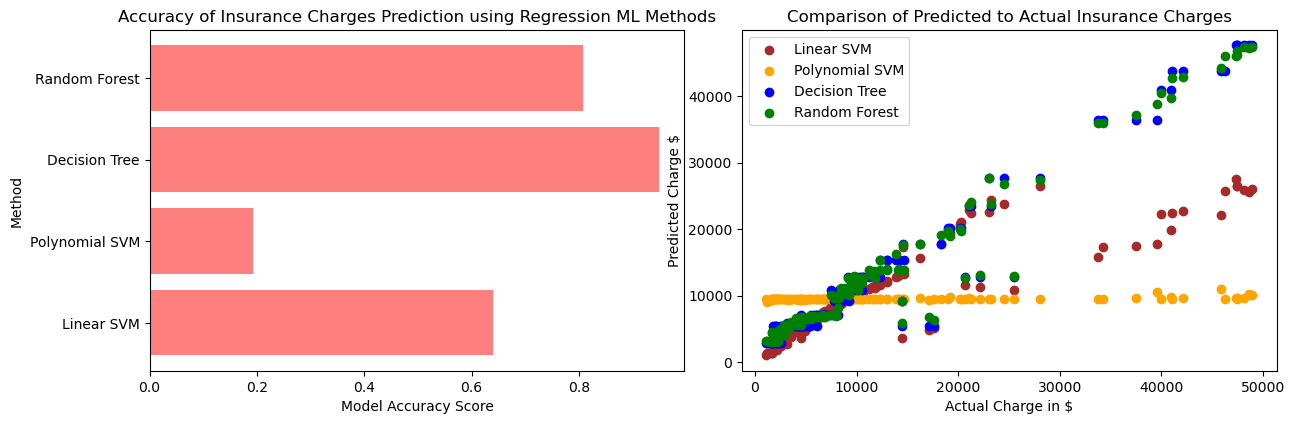

In [35]:
model_names = ["Linear SVM", "Polynomial SVM", "Decision Tree", "Random Forest"]
model_scores = [scoreSVR, scoreSVRpoly, scoreDT, scoreRF]


fig3, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
fig3.tight_layout()


ax1.barh(model_names, model_scores, align = "center", color = "red", alpha = 0.5)
ax1.set_ylabel("Method")
ax1.set_xlabel("Model Accuracy Score")
ax1.set_title("Accuracy of Insurance Charges Prediction using Regression ML Methods")


ax2.scatter(y_validate, y_predSVR, color = 'brown', label = model_names[0])
ax2.scatter(y_validate, y_predSVRpoly, color = 'orange', label = model_names[1])
ax2.scatter(y_validate, y_predDT, color = 'blue', label = model_names[2])
ax2.scatter(y_validate, y_predRF, color = 'green', label = model_names[3])

ax2.legend()
ax2.set_ylabel("Predicted Charge $")
ax2.set_xlabel("Actual Charge in $")
ax2.set_title("Comparison of Predicted to Actual Insurance Charges")

fig3.show()